# Analisi dei siti dei Comuni italiani con Lighthouse

È stato fatto girare [Lighthouse](https://github.com/GoogleChrome/lighthouse) su tutti i siti dei Comuni italiani, usando gli URL "Sito istituzionale" prelevato da [IndicePA](https://www.indicepa.gov.it).

Il codice sorgente e i risultati si trovano qui https://github.com/mfortini/carbonEnti

In [26]:
import pandas as pd
import seaborn as sns

sns.set_theme()


In [49]:
enti = pd.read_csv("enti.csv")
d = pd.read_csv("entiRes.csv").merge(enti,on="Codice_IPA")

d1 = d[d["lighthouseScore"] > 0][["Codice_IPA","Denominazione_ente","url","lighthouseScore","firstMeaningfulPaint","totalByteWeight"]]

In quanti enti è fallito Lighthouse?

In [65]:
d[d["lighthouseScore"]==0]["Codice_IPA"].count()

2458

Quanti hanno risposto in HTTPS e quanti in HTTP? (True: HTTPS, False: HTTP)

In [68]:
d1["url"].str.match("https://").value_counts()

True     5224
False      72
Name: url, dtype: int64

## Boxplot dei punteggi di Lighthouse

Si può vedere la distribuzione del punteggio sintetico di Lighthouse (da 0 a 100).

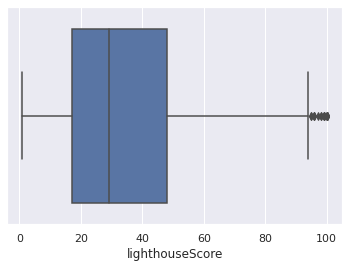

In [50]:
sns.boxplot(data=d1,x='lighthouseScore');

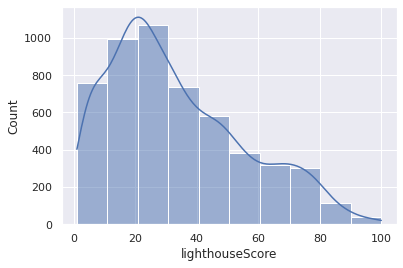

In [51]:
sns.histplot(data=d1,x="lighthouseScore",bins=10,kde=True);

## Analisi del tempo necessario per avere un contenuto "significativo"

I tempi indicati sono in **millisecondi**

In [52]:
d1["firstMeaningfulPaint"].describe()

count     5296.000000
mean      6375.850083
std       4056.160918
min        788.810000
25%       3779.165250
50%       5363.996750
75%       7089.044625
max      58666.645000
Name: firstMeaningfulPaint, dtype: float64

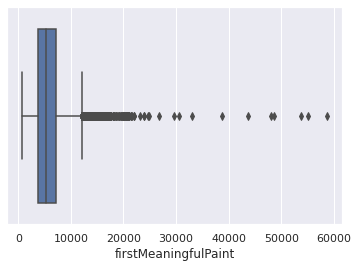

In [53]:
sns.boxplot(data=d1,x="firstMeaningfulPaint");

Ci limitiamo ai valori minori di 18000 per avere una visibilità migliore della distribuzione.

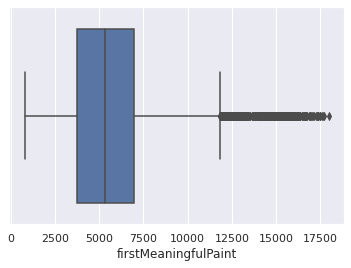

In [54]:
sns.boxplot(data=d1[d1["firstMeaningfulPaint"]<18000],x="firstMeaningfulPaint");

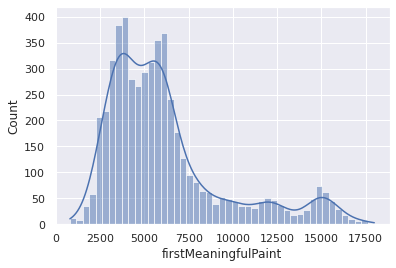

In [55]:
sns.histplot(data=d1[d1["firstMeaningfulPaint"]<18000],x="firstMeaningfulPaint",kde=True);

## Analisi del peso totale della pagina

In [56]:
d1["totalByteWeight"].describe()

count    5.296000e+03
mean     3.682605e+06
std      5.038417e+06
min      2.090000e+02
25%      1.358204e+06
50%      2.553586e+06
75%      4.261784e+06
max      1.011168e+08
Name: totalByteWeight, dtype: float64

In [57]:
d1["totalByteWeight"].mode()

0     395833.0
1    1288607.0
dtype: float64

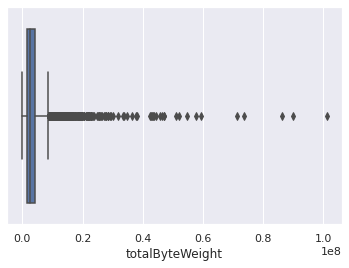

In [58]:
sns.boxplot(data=d1,x="totalByteWeight");

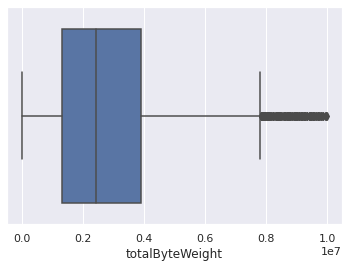

In [59]:
sns.boxplot(data=d1[d1["totalByteWeight"]<10e6],x="totalByteWeight");

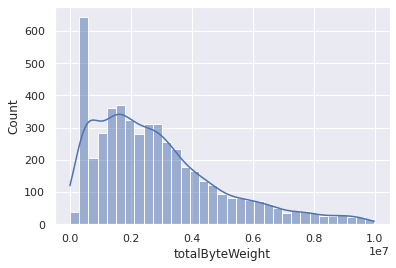

In [60]:
sns.histplot(data=d1[d1["totalByteWeight"]<10e6],x="totalByteWeight",kde=True);

## I 10 migliori punteggi

In [61]:
d1.sort_values("lighthouseScore",ascending=False).head(10).style.format({
    "lighthouseScore": "{:.2f}",
    "firstMeaningfulPaint": "{:,.2f}",
    "totalByteWeight": "{:,.2f}"
}).hide_index()

Codice_IPA,Denominazione_ente,url,lighthouseScore,firstMeaningfulPaint,totalByteWeight
c_e754,Comune di Lusciano,https://www.comune.lusciano.ce.it,100.00,874.00,398.00
c_h982,Comune di San Marco d'Alunzio,https://www.comune.sanmarcodalunzio.me.it,100.00,834.17,346.00
c_a571,Comune di Bagnolo Piemonte,https://www.comune.bagnolo.cn.it,100.00,823.94,355.00
c_c778,Comune di Civitella Alfedena,https://www.comune.civitellaalfedena.aq.it,100.00,810.31,"395,833.00"
c_f494,Comune di Montefalcone di Val Fortore,https://www.montefalconedivalfortore.campania.it,100.00,936.01,209.00
c_b603,Comune di Canicattini Bagni,https://www.comunedicanicattinibagni.it,100.00,827.59,359.00
c_i946,Comune di Stella,https://www.comune.stella.sv.it,100.00,788.81,369.00
c_a811,Comune di Bertonico,https://www.comune.bertonico.lo.it,100.00,824.37,341.00
c_A069,Comune di Aggius,https://www.comuneaggius.it,99.00,"1,386.34","50,138.00"
c_d298,Comune di Diano San Pietro,https://www.comune.dianosanpietro.im.it,99.00,"1,542.24","102,976.00"


## I 10 che hanno richiesto più tempo 

In [62]:
d1.sort_values("firstMeaningfulPaint",ascending=False).head(10).style.format({
    "firstMeaningfulPaint": "{:,.2f}",
    "totalByteWeight": "{:,.2f}"
}).hide_index()

Codice_IPA,Denominazione_ente,url,lighthouseScore,firstMeaningfulPaint,totalByteWeight
c_l590,Comune di Valle di Cadore,https://www.comune.valledicadore.bl.it,11.000000,"58,666.64","2,045,652.00"
c_i626,Comune di Seren del Grappa,https://www.comune.serendelgrappa.bl.it,9.000000,"55,073.58","3,062,104.00"
c_c458,Comune di Cencenighe Agordino,https://www.comune.cencenigheagordino.bl.it,11.000000,"53,697.09","2,931,320.00"
c_c672,Comune di Cibiana di Cadore,https://www.comune.cibianadicadore.bl.it,1.000000,"48,630.26","1,824,049.00"
c_i527,Comune di Schiavon,https://www.comune.schiavon.vi.it,9.000000,"48,115.11","2,956,750.00"
c_a121,Comune di Alano di Piave,https://www.comune.alanodipiave.bl.it,6.000000,"43,609.17","2,013,734.00"
c_e911,Comune di Marano di Valpolicella,https://www.comunemaranovalpolicella.vr.it,5.000000,"38,665.58","7,442,840.00"
c_d315,Comune di Dogliola,https://www.dogliola.it,16.000000,"32,954.35","4,774,709.00"
c_m375,Comune di Alpago,https://www.comunealpago.bl.it,2.000000,"30,563.26","3,398,590.00"
c_c254,Comune di Castelrotto,https://www.castelrotto.it,15.000000,"29,672.10","4,717,309.00"


## I 10 che pesano di piu in termini di dati trasferiti

In [63]:
d1.sort_values("totalByteWeight",ascending=False).head(10).style.format({
    "firstMeaningfulPaint": "{:,.2f}",
    "totalByteWeight": "{:,.2f}"
}).hide_index()

Codice_IPA,Denominazione_ente,url,lighthouseScore,firstMeaningfulPaint,totalByteWeight
c_a542,Comune di Badolato,https://www.comune.badolato.cz.it,2.000000,"10,225.40","101,116,824.00"
c_b645,Comune di Capaci,https://www.comune.capaci.pa.it,40.000000,"4,413.21","89,986,687.00"
c_h525,Comune di Roncadelle,https://www.comune.roncadelle.bs.it,42.000000,"10,086.28","86,404,124.00"
c_c554,Comune di Cervicati,https://www.comune.cervicati.cs.it,4.000000,"5,665.93","73,598,184.00"
c_g403,Comune di Pedaso,https://www.comunedipedaso.it,15.000000,"5,167.45","71,128,729.00"
c_g293,Comune di Palombara Sabina,https://www.comune.palombarasabina.rm.it,45.000000,"4,048.29","59,482,098.00"
c_m214,Comune di Badesi,https://www.comunebadesi.ot.it,12.000000,"15,106.25","57,810,082.00"
c_g653,Comune di Pieve Santo Stefano,https://www.pievesantostefano.net/,16.000000,"5,849.98","54,821,034.00"
c_b839,Comune di Carrodano,https://www.comune.carrodano.sp.it,3.000000,"6,364.82","52,041,581.00"
c_g054,Comune di Oltressenda Alta,https://www.comune.oltressendaalta.bg.it,7.000000,"5,817.67","51,050,599.00"
